# Imports

In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pycoingecko import CoinGeckoAPI
from sklearn.model_selection import train_test_split
import requests
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import warnings
warnings.filterwarnings("ignore")

# Import data

In [2]:


def get_crypto_price(symbol, exchange, start_date = None):
    api_key = 'YOUR API KEY'
    api_url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={symbol}&market={exchange}&apikey={api_key}'
    raw_df = requests.get(api_url).json()
    df = pd.DataFrame(raw_df['Time Series (Digital Currency Daily)']).T
    df = df.rename(columns = {'1a. open (USD)': 'open', '2a. high (USD)': 'high', '3a. low (USD)': 'low', '4a. close (USD)': 'close', '5. volume': 'volume'})
    for i in df.columns:
        df[i] = df[i].astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.iloc[::-1].drop(['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)', '6. market cap (USD)'], axis = 1)
    if start_date:
        df = df[df.index >= start_date]
    return df

df = get_crypto_price(symbol = 'BTC', exchange = 'USD', start_date = '2022-1-1')
df

,open,high,low,close,volume
2022-01-01,46216.93,47954.63,46208.37,47722.65,19604.463250
2022-01-02,47722.66,47990.00,46654.00,47286.18,18340.460400
2022-01-03,47286.18,47570.00,45696.00,46446.10,27662.077100
2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.413600
2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.118570
2022-01-06,43451.14,43816.00,42430.58,43082.31,38880.373050
2022-01-07,43082.30,43145.83,40610.00,41566.48,54836.508180
2022-01-08,41566.48,42300.00,40501.00,41679.74,32952.731110
2022-01-09,41679.74,42786.70,41200.02,41864.62,22724.394260
2022-01-10,41864.62,42248.50,39650.00,41822.49,50729.170190


In [3]:
df['date'] = pd.to_datetime(df.index)
df['date'] = df['date'].apply(mpl_dates.date2num)
df = df.loc[:,['date', 'open', 'high', 'low', 'close']]

# Candlestick pattern

In [4]:
 
def is_support(df,i):  
  cond1 = df['low'][i] < df['low'][i-1]   
  cond2 = df['low'][i] < df['low'][i+1]   
  cond3 = df['low'][i+1] < df['low'][i+2]   
  cond4 = df['low'][i-1] < df['low'][i-2]  
  return (cond1 and cond2 and cond3 and cond4) 

# determine bearish fractal
def is_resistance(df,i):  
  cond1 = df['high'][i] > df['high'][i-1]   
  cond2 = df['high'][i] > df['high'][i+1]   
  cond3 = df['high'][i+1] > df['high'][i+2]   
  cond4 = df['high'][i-1] > df['high'][i-2]  
  return (cond1 and cond2 and cond3 and cond4)

# to make sure the new level area does not exist already
def is_far_from_level(value, levels, df):    
  ave =  np.mean(df['high'] - df['low'])    
  return np.sum([abs(value-level)<ave for _,level in levels])==0
  
# a list to store resistance and support levels
levels = []
for i in range(2, df.shape[0] - 2):  
  if is_support(df, i):    
    low = df['low'][i]    
    if is_far_from_level(low, levels, df):      
      levels.append((i, low))  
  elif is_resistance(df, i):    
    high = df['high'][i]    
    if is_far_from_level(high, levels, df):      
      levels.append((i, high))

In [5]:
# for visualization
def plot_all(levels, df):    
  fig, ax = plt.subplots(figsize=(16, 9))   
  candlestick_ohlc(ax,df.values,width=0.6, colorup='green', 
    colordown='red', alpha=0.8)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)    
  for level in levels:        
    plt.hlines(level[1], xmin = df['date'][level[0]], xmax = 
      max(df['date']), colors='blue', linestyle='--') 
    plt.text(x=df['date'][level[0]], y=level[1]+0.005,s='{}'.format(level[1]))
  fig.show();
  

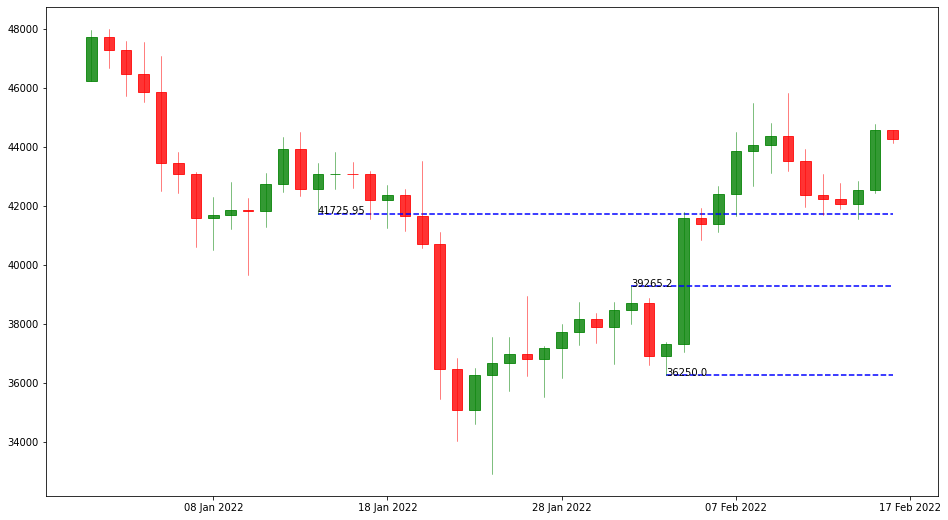

In [6]:
plot_all(levels,df)


In [7]:

#method 1: fractal candlestick pattern
def detect_level_method_1(df):
  levels = []
  for i in range(2,df.shape[0]-2):
    if is_support(df,i):
      l = df['low'][i]
      if is_far_from_level(l, levels, df):
        levels.append((i,l))
    elif is_resistance(df,i):
      l = df['high'][i]
      if is_far_from_level(l, levels, df):
        levels.append((i,l))
  return levels


# to detect breakout
def has_breakout(levels, previous, last):
  for _, level in levels:
    cond1 = (previous['open'] < level) 
    cond2 = (last['open'] > level) and (last['low'] > level)
  return (cond1 and cond2)

In [8]:
df.iloc[-1]

date     19039.00
open     44544.85
high     44549.97
low      44125.00
close    44246.02
Name: 2022-02-16 00:00:00, dtype: float64

In [9]:
has_breakout(levels, df.iloc[-2], df.iloc[-1])


False